# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('preprocessed_data_single_cole.csv')
dataset.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,ax,ay,az,...,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,pitch_type,pitcher_id
0,0.875,2.851,94.2,85.8,2464.304,212.257,35.2,-12.473,33.209,-12.412,...,-5.426,83.65,-2.606,161.80,5.704,-6.57,10.37,69.0,FF,543037
1,-0.502,1.781,91.6,84.0,2363.093,217.113,34.7,-13.157,30.069,-14.786,...,-7.154,136.14,-2.769,190.69,5.555,-7.28,9.58,50.0,FF,543037
2,-0.992,1.767,87.3,80.6,1589.739,252.360,22.6,-13.347,26.523,-27.930,...,-3.941,154.81,-2.823,191.07,5.524,-8.07,2.52,59.0,CH,543037
3,-1.205,1.707,94.0,85.5,2721.306,215.655,44.9,-15.029,34.298,-11.225,...,-8.331,162.93,-2.920,192.69,5.565,-7.96,11.06,80.0,FF,543037
4,0.085,2.182,93.0,85.4,2148.959,224.677,32.0,-14.152,30.557,-17.862,...,-5.826,113.76,-2.707,179.87,5.600,-7.59,7.64,30.0,FF,543037


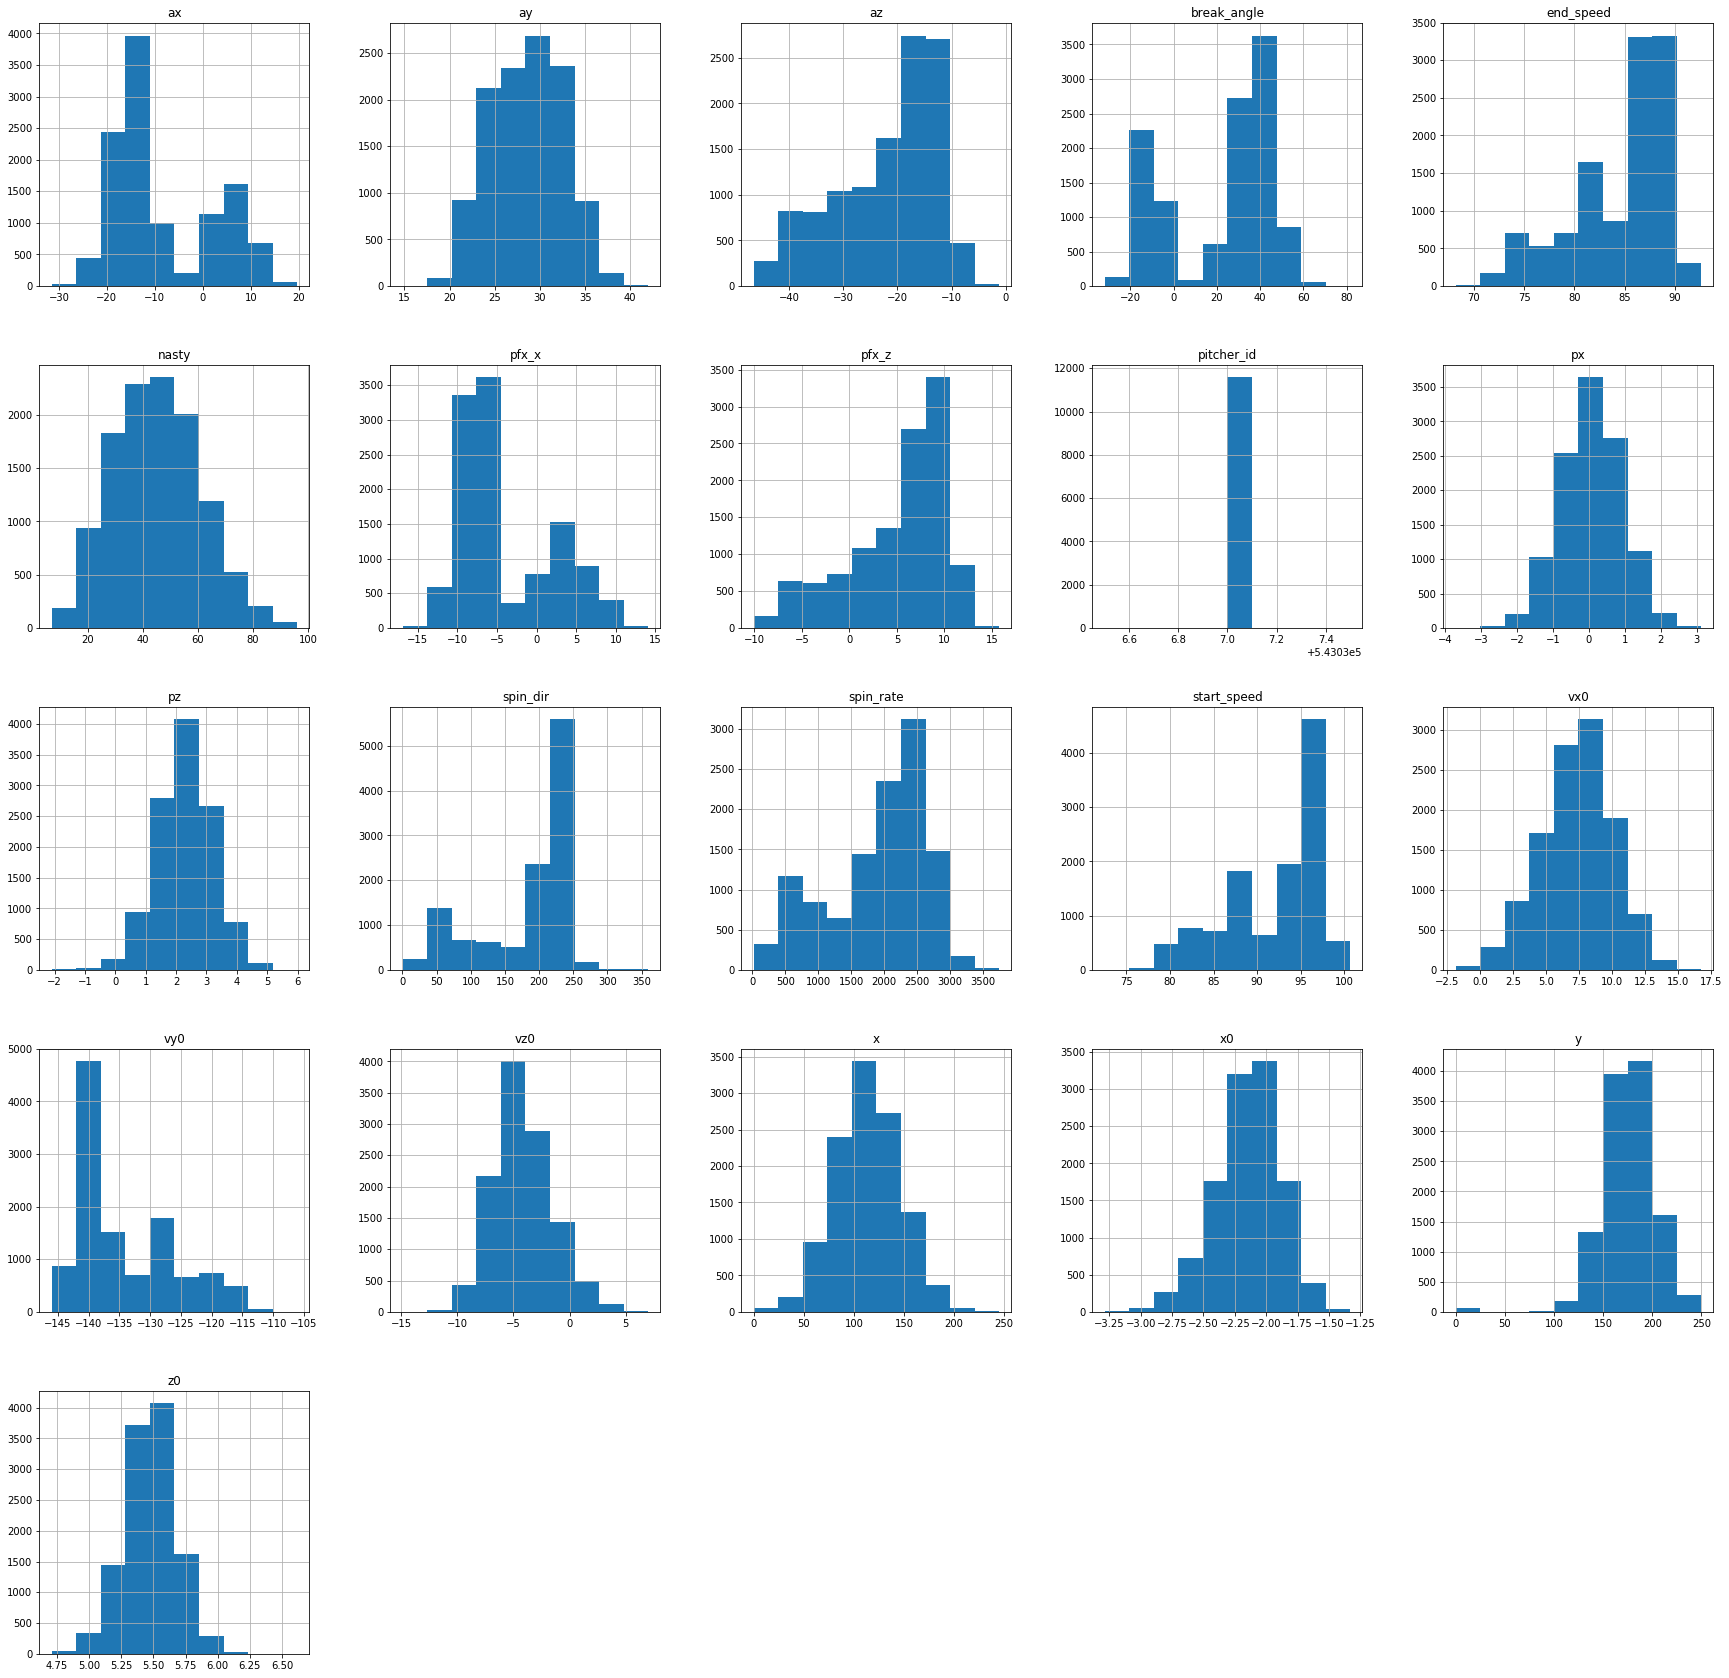

In [4]:
#Visualize by histogram
dataset.hist(figsize= (30,30))
plt.show()

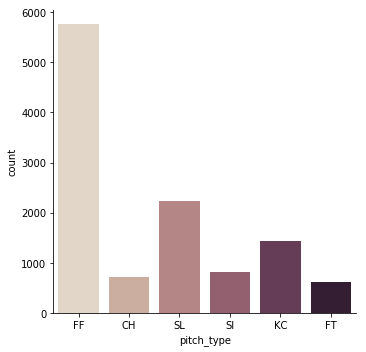

In [4]:
#Visualize pitch type
import seaborn as sns
sns.catplot(x="pitch_type", kind="count", palette="ch:.25", data=dataset);
plt.show()

In [5]:
# Import ependent Variable
X = dataset.iloc[:, 0:19].values

In [6]:
# Import Dependent Variable
#y = dataset.iloc[0:100000, 29].values
y = dataset.iloc[0:, 20].values

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#convert y into binary format
import keras
from keras.utils import to_categorical
y_binary = to_categorical(y)

Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [24]:

keys = labelencoder_y.classes_
values = labelencoder_y.transform(labelencoder_y.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'FF': 1, 'FT': 2, 'CH': 0, 'SI': 4, 'KC': 3, 'SL': 5}


# Split data into trainning set and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Importing the Keras libraries and packages
#import keras
import tensorflow as tf
from keras import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation


In [10]:
#Initilize ANN
classifier = Sequential()

#Add input layer and fitst hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform', input_dim = 19))


#Add second hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform'))

#Add oupt layer
#classifier.add(Dense(10, activation = tf.nn.softmax, kernel_initializer='uniform'))
classifier.add(Dense(6, activation = tf.nn.softmax, kernel_initializer='uniform'))

#compiling ANN
#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])

sgd = keras.optimizers.SGD(0.0025, momentum=0.0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50, validation_split=0.1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 8334 samples, validate on 926 samples
Epoch 1/50
8334/8334 [==============================] - 2s 297us/step - loss: 1.6652 - categorical_accuracy: 0.4972 - val_loss: 1.5759 - val_categorical_accuracy: 0.4849
Epoch 2/50
8334/8334 [==============================] - 2s 274us/step - loss: 1.5030 - categorical_accuracy: 0.4964 - val_loss: 1.4588 - val_categorical_accuracy: 0.4849
Epoch 3/50
8334/8334 [==============================] - 3s 316us/step - loss: 1.3490 - categorical_accuracy: 0.4964 - val_loss: 1.2286 - val_categorical_accuracy: 0.4849
Epoch 4/50
8334/8334 [==============================] - 3s 325us/step - loss: 1.0219 - categorical_accuracy: 0.6581 - val_loss: 0.9115 - val_categorical_accuracy: 0.6814
Epoch 5/50
8334/8334 [==============================] - 2s 254us/step - loss: 0.8428 - categorical_accuracy: 0.7661 - val_loss: 0.8297 - val_categorical_accuracy: 0.7538
Epoch 6/50
8334/8334 [==============================] - 2s 253us/step - loss: 0.7861 - categorical_accu

8334/8334 [==============================] - 3s 334us/step - loss: 0.2050 - categorical_accuracy: 0.9279 - val_loss: 0.2056 - val_categorical_accuracy: 0.9298
Epoch 49/50
8334/8334 [==============================] - 3s 334us/step - loss: 0.2010 - categorical_accuracy: 0.9293 - val_loss: 0.2007 - val_categorical_accuracy: 0.9341
Epoch 50/50
8334/8334 [==============================] - 2s 271us/step - loss: 0.1972 - categorical_accuracy: 0.9303 - val_loss: 0.1983 - val_categorical_accuracy: 0.9352


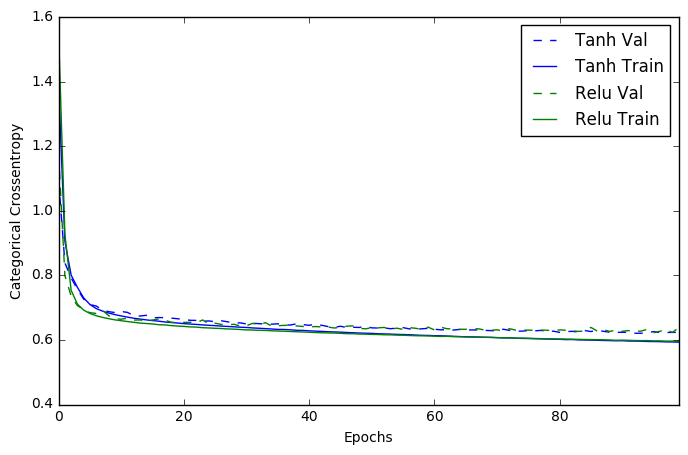

In [26]:
def plot_history(histories, key='categorical_crossentropy'):
  plt.figure(figsize=(8,5))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('tanh', model),
              ('relu', model_small)])

plt.show()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.35)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.savetxt("cm.csv", cm, delimiter=",")

Normalized confusion matrix
[[0.96376812 0.02898551 0.         0.         0.         0.00724638]
 [0.         0.97608881 0.00768574 0.         0.01622545 0.        ]
 [0.01612903 0.36290323 0.53225806 0.         0.08870968 0.        ]
 [0.         0.         0.         0.99333333 0.         0.00666667]
 [0.         0.22651934 0.06629834 0.         0.70718232 0.        ]
 [0.         0.00248756 0.         0.00746269 0.         0.99004975]]


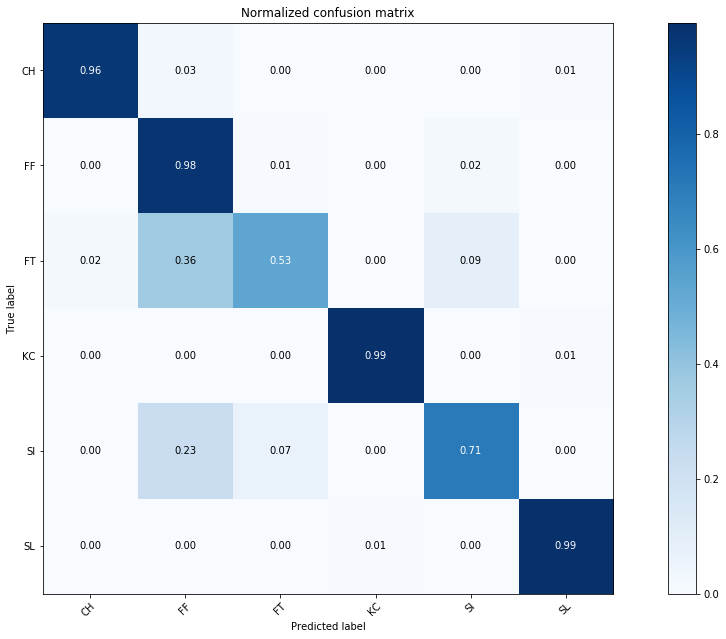

In [17]:
# Plot non-normalized confusion matrix


class_names = ['CH','FF', 'FT', 'KC','SI','SL',]

#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5)
    #fig.tight_layout()
    return ax




#class_names = dataset['CH', 'CU', 'FC', 'FF', 'FS', 'FT', 'KC', 'KN', 'SI', 'SL']
#plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

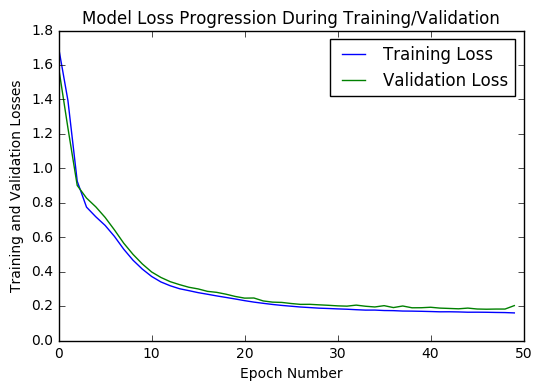

In [15]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

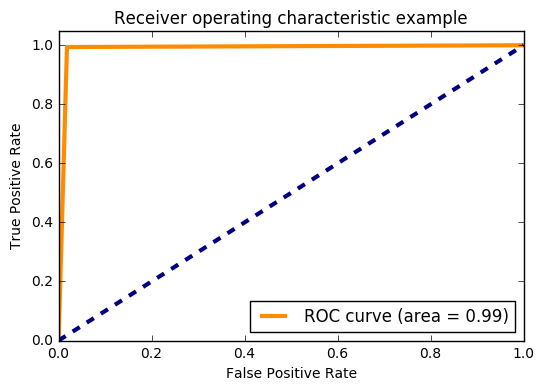

In [23]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 3
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



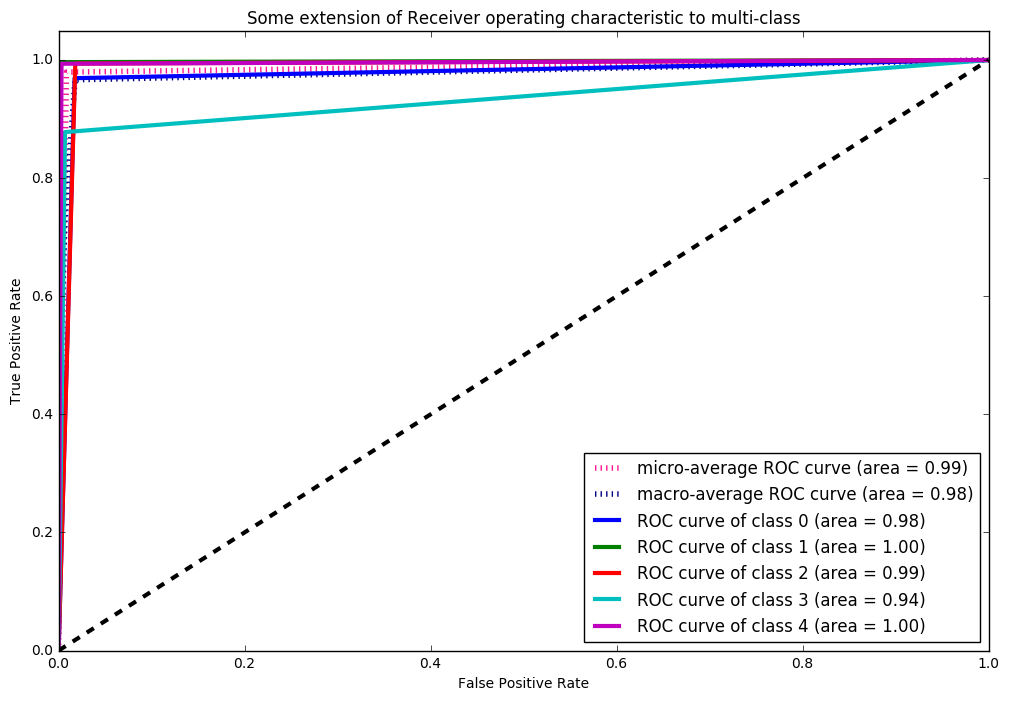

In [24]:
# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Compute micro-average ROC curve and ROC area
thresholds = dict()
fpr["micro"], tpr["micro"], thresholds["micro"] = metrics.roc_curve(y_test.ravel(), y_pred.ravel(),pos_label=2)
print(fpr)
print(tpr)
print(thresholds)